In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from common import Images, Fonts, Data, Colors, add_twitter_handle
from matplotlib.patches import Rectangle, Ellipse, Arc

In [12]:
season = "2023"
df = Data.get_nwsl_goals(season = season)
df = df.rename(columns={"period": "half", "minute": "min", "second": "sec"})
df

,season,date,home,away,player,team,assist,half,min,sec,x,y,own_goal,is_playoffs
2149,2023,2023-03-25,NC,KCC,Mille Gejl,NC,Narumi Miura,1,22,24,70.4,63.8,False,False
2150,2023,2023-03-25,SD,CHI,Yuki Nagasato,CHI,NaN,1,17,41,97.6,47.4,False,False
2151,2023,2023-03-25,SD,CHI,Amirah Ali,SD,NaN,1,21,34,98.3,48.4,False,False
2152,2023,2023-03-25,SD,CHI,Jaedyn Shaw,SD,NaN,1,31,7,81.6,50.4,False,False
2153,2023,2023-03-25,SD,CHI,Mallory Swanson,CHI,NaN,1,48,18,88.5,50.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,2023,2023-11-05,POR,NJNY,Katie Stengel,NJNY,Kristie Mewis,4,106,10,81.5,37.3,False,True
2492,2023,2023-11-05,SD,RGN,Veronica Latsko,RGN,Rose Lavelle,2,46,19,95.0,15.6,False,True
2493,2023,2023-11-11,RGN,NJNY,Lynn Williams,NJNY,Midge Purce,1,23,47,93.6,48.5,False,True
2494,2023,2023-11-11,RGN,NJNY,Rose Lavelle,RGN,Bethany Balcer,1,28,14,85.5,47.8,False,True


In [13]:
# Remove penalty shots to avoid skewing the data
df = df[~((df["x"] == 88.5) & (df["y"] == 50.0))]

In [18]:
field = Colors.WHITE
lines = Colors.BLACK

<Figure size 864x576 with 0 Axes>

<Figure size 4800x3200 with 0 Axes>

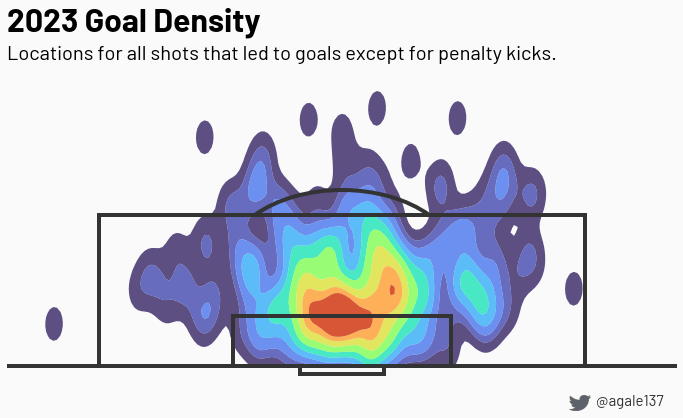

In [85]:
# Set up plot
plt.clf()
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(field)
ax.set_facecolor(field)
plt.gca().set_aspect('equal')

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([])
ax.set_yticks([])
plt.ylim([60, 105])
plt.xlim([10, 90])
ax.invert_yaxis()

# Build the field
# Touchline
ax.add_patch(Rectangle((0, 0), 100, 100, ec=lines, fc=field, lw=5))

# Heatmap
hm = sns.kdeplot(
    x=df["y"],
    y=df["x"],
    cmap="turbo", # turbo, viridis_r
    shade=True,
    levels=10,
    bw_adjust=0.3,
    alpha=0.8,
    antialiased=True,
)

# Cover the heatmap off the field
ax.add_patch(Rectangle((0, 100), 100, 10, ec=None, fc=field))

# Center circle
# ax.add_patch(Ellipse((50, 50), 16, 26, ec=lines, fill=False, lw=5))
# Endline
ax.add_patch(Rectangle((0, 50), 100, 50, ec=lines, fill=False, lw=4))
# 18-yard box
ax.add_patch(Rectangle((21, 100 - 18), 58, 18, ec=lines, fill=False, lw=4))
# 6-yard box
ax.add_patch(Rectangle((37, 100 - 6), 26, 6, ec=lines, fill=False, lw=4))
# Goal
ax.add_patch(Rectangle((45, 100), 10, 1, ec=lines, fill=False, lw=4))
# Penalty arc
ax.add_artist(
    Arc((50, 100 - 12), 28, 18, angle=0, theta1=210, theta2=330, ec=lines, lw=4)
)

# Title
plt.text(
    10,
    60,
    season + " Goal Density",
    fontsize=32,
    fontproperties=Fonts.BARLOW_BOLD,
    ha="left",
)
# Subtitle
plt.figtext(
    0.125,
    0.78,
    "Locations for all shots that led to goals except for penalty kicks.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.77, y=0.17, fs=15, w=0.03)

# Save image
plt.savefig(
    "images/goal_density_" + season + ".png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
)

<Figure size 864x576 with 0 Axes>

<Figure size 4800x3200 with 0 Axes>

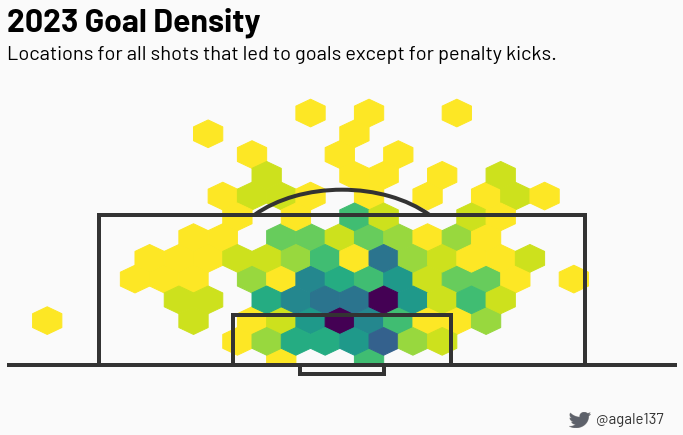

In [89]:
# Set up plot
plt.clf()
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(field)
ax.set_facecolor(field)
plt.gca().set_aspect('equal')

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([])
ax.set_yticks([])
plt.ylim([60, 105])
plt.xlim([10, 90])
ax.invert_yaxis()

# Plot data
plt.hexbin(df["y"], df["x"], gridsize=(22, 20), cmap="viridis_r", mincnt=1)

# Cover the heatmap off the field
ax.add_patch(Rectangle((0, 100), 100, 10, ec=None, fc=field))

# Endline
ax.add_patch(Rectangle((0, 50), 100, 50, ec=lines, fill=False, lw=4))
# 18-yard box
ax.add_patch(Rectangle((21, 100 - 18), 58, 18, ec=lines, fill=False, lw=4))
# 6-yard box
ax.add_patch(Rectangle((37, 100 - 6), 26, 6, ec=lines, fill=False, lw=4))
# Goal
ax.add_patch(Rectangle((45, 100), 10, 1, ec=lines, fill=False, lw=4))
# Penalty arc
ax.add_artist(
    Arc((50, 100 - 12), 28, 18, angle=0, theta1=210, theta2=330, ec=lines, lw=4)
)

# Title
plt.text(
    10,
    60,
    season + " Goal Density",
    fontsize=32,
    fontproperties=Fonts.BARLOW_BOLD,
    ha="left",
)
# Subtitle
plt.figtext(
    0.125,
    0.78,
    "Locations for all shots that led to goals except for penalty kicks.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.77, y=0.14, fs=15, w=0.03)

# Save image
plt.savefig("images/goal_density2_" + season + ".png", bbox_inches="tight", transparent=False, pad_inches=0.5)